# Imports 

In [444]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import sklearn.linear_model
import sklearn.pipeline
import sklearn.preprocessing
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.utils import shuffle

import sklearn.neighbors
from sklearn.utils import shuffle

from scipy.spatial import Voronoi, voronoi_plot_2d

# Get data from url

In [446]:
urlmat = 'https://raw.githubusercontent.com/carolinasofia/studentdata/master/student-mat.csv'
dfmat = pd.read_csv(urlmat)

urlpor = 'https://raw.githubusercontent.com/carolinasofia/studentdata/master/student-por.csv'
dfpor = pd.read_csv(urlpor)

urlporbin = 'https://raw.githubusercontent.com/carolinasofia/studentdata/master/student-por-binary.csv'
dfporbin = pd.read_csv(urlporbin)
dfporbin = shuffle(dfporbin)

# Function for a scatter plot

In [485]:
def scatter_plot(feature,target):
    plt.figure(figsize=(16,8))
    plt.scatter(
        feature,
        target,
        c='black')
    plt.legend()
    plt.show()

# Model using extra educational support, mothers and fathers education and G2 grades to predict G3 grades
## Data NOT split into train vs test

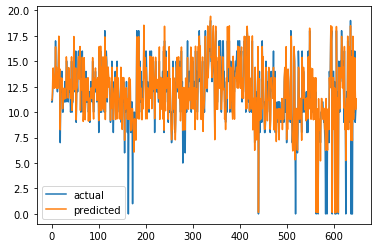

0.8440322505049298


In [424]:
#print(dfporbin.columns)
dfmedu = dfporbin[['schoolsup','Medu','Fedu','G2','G3']]
x = dfmedu.values[ :, :4]
y = dfmedu.values[ :, 4:]
reg = LinearRegression().fit(x, y)
y2 = reg.predict(x)
plt.plot(list(y), label = 'actual')
plt.plot(list(y2), label = 'predicted')
plt.legend()
plt.show()
print(reg.score(x, y))

#  Ploting grades G3 against romantic relationships

Bins: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


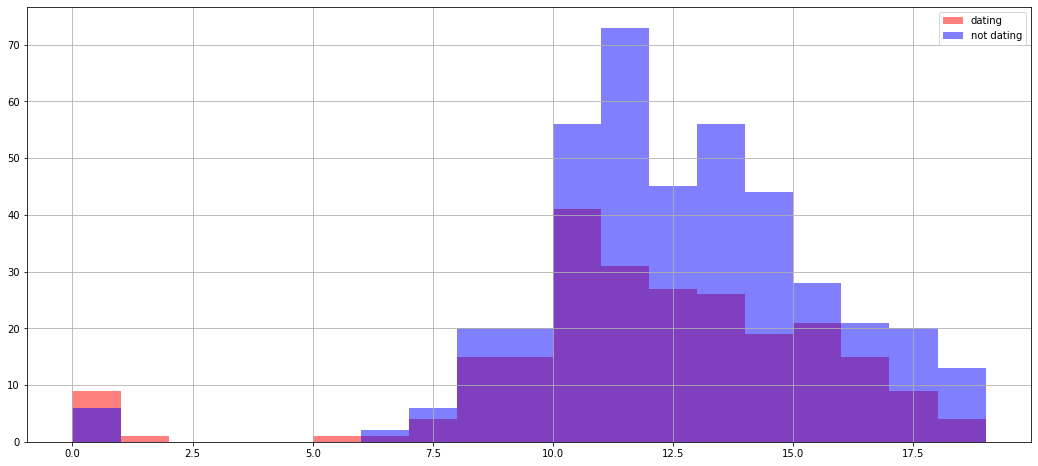

In [389]:
bins = np.arange(0, 20, 1)
print("Bins:", bins)

ax = dfpor.loc[dfpor.romantic == "yes", "G3"].hist(bins=bins, color="red", alpha=0.5, label="dating", figsize=(18, 8))
dfpor.loc[dfpor.romantic == "no", "G3"].hist(bins=bins, color="blue", ax=ax, alpha=0.5, label="not dating")
ax.legend();

# Model using ALL features. Data NOT split into test v train

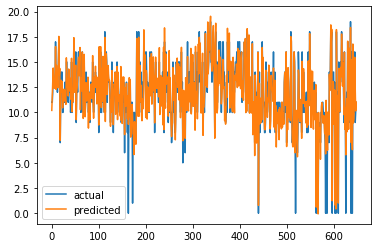

0.8570059569236035


In [425]:
dfmedu = dfporbin

x = dfmedu.values[ :, :32]
y = dfmedu.values[ :, 32:]
r = LinearRegression().fit(x, y)
y2 = r.predict(x)
plt.plot(list(y), label = 'actual')
plt.plot(list(y2), label = 'predicted')
plt.legend()
plt.show()
print(r.score(x, y))

## same thing but with lasso

(649, 32)
(649, 1)
[-0.16952933 -0.09198587  0.01775945  0.1031457   0.01490552 -0.02190745
  0.         -0.00932249 -0.00604323 -0.05897737 -0.00333824  0.0443388
  0.1101445   0.04252561 -0.19472639 -0.09765138  0.08418466 -0.
  0.         -0.01641023  0.082102    0.0443409  -0.         -0.01755944
 -0.03213234 -0.01169734 -0.07125237 -0.00600541 -0.04206255  0.01707846
  0.1341455   0.87598178]
[0.27210683]
0.8559172494786526


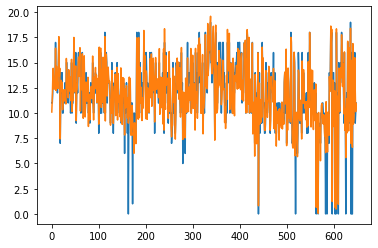

In [431]:
dfmedu = dfporbin
x = dfmedu.values[ :, :32]
y = dfmedu.values[ :, 32:]
print(x.shape)
print(y.shape)
clf = linear_model.Lasso(alpha=0.01)
clf.fit(x,y)
##display the coefficients for each of the features
print(clf.coef_)
print(clf.intercept_)
y2lasso = clf.predict(x)
plt.plot(list(y), label = 'actual')
plt.plot(list(y2lasso), label = 'predicted')
print(clf.score(x, y))

# Splitting data into train vs test

In [442]:
msk = np.random.rand(len(dfporbin)) < 0.75
train = dfporbin[msk]
test = dfporbin[~msk]
print(len(test))
print(len(train))

172
477


## Lasso on ALL data WITH train vs test

[-0.         -0.         -0.          0.          0.          0.
  0.         -0.         -0.         -0.         -0.          0.
  0.          0.         -0.         -0.          0.         -0.
 -0.         -0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.05462796  0.86000746]
[1.29351218]


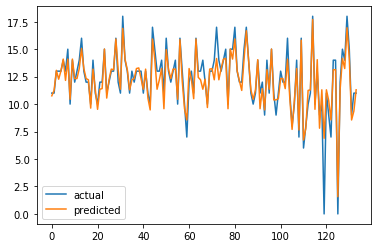

0.8699125411796506


In [437]:
x_train = train.values[ :, :32]
y_train = train.values[ :, 32:]
x_test = test.values[ :, :32]
y_test = test.values[ :, 32:]
clf = linear_model.Lasso(alpha=1)
clf.fit(x_train,y_train)
print(clf.coef_)
print(clf.intercept_)
y2l = clf.predict(x_test)
plt.plot(list(y_test), label = 'actual')
plt.plot(list(y2l), label = 'predicted')
plt.legend()
plt.show()
print(clf.score(x_test, y_test))

### same but without lasso

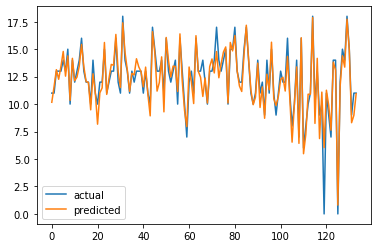

0.8559733411289647


In [436]:
x_train = train.values[ :, :32]
y_train = train.values[ :, 32:]
x_test = test.values[ :, :32]
y_test = test.values[ :, 32:]
reg = LinearRegression().fit(x_train, y_train)
y2 = reg.predict(x_test)
plt.plot(list(y_test), label = 'actual')
plt.plot(list(y2), label = 'predicted')
plt.legend()
plt.show()
print(reg.score(x, y))

# Model using ONLY grades. How G1,G2 affect G3

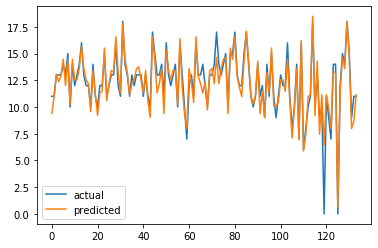

0.8818140646899071


In [439]:
df1 = dfporbin[['G1','G2','G3']]

tt = np.random.rand(len(df1)) < 0.8
train = df1[msk]
test = df1[~msk]

x_train = train.values[ :, :2]
y_train = train.values[ :, 2:]
x_test = test.values[ :, :2]
y_test = test.values[ :, 2:]
r1 = LinearRegression().fit(x_train, y_train)
y2 = r1.predict(x_test)
plt.plot(list(y_test), label = 'actual')
plt.plot(list(y2), label = 'predicted')
plt.legend()
plt.show()
print(r1.score(x_test, y_test))

## same + lasso

[0.0546283  0.86000718]
[1.29351143]
0.8699125566823368


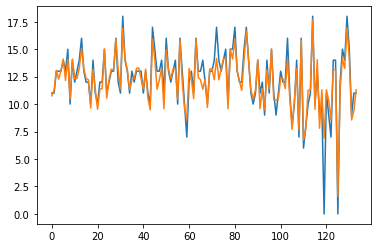

In [440]:
df1 = dfporbin[['G1','G2','G3']]

x_train = train.values[ :, :2]
y_train = train.values[ :, 2:]
x_test = test.values[ :, :2]
y_test = test.values[ :, 2:]
clf = linear_model.Lasso(alpha=1)
clf.fit(x_train,y_train)
print(clf.coef_)
print(clf.intercept_)
y2las = clf.predict(x_test)
plt.plot(y_test)
plt.plot(y2las)
print(clf.score(x_test, y_test))

##Comparing the two algorithms 

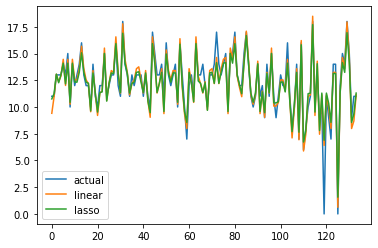

0.8818140646899071
0.8699125566823368


In [478]:
plt.plot(list(y_test), label = 'actual')
plt.plot(list(y2), label = 'linear')
plt.plot(list(y2las), label = 'lasso')
plt.legend()
plt.show()
print(r1.score(x_test,y_test))
print(clf.score(x_test,y_test))

# Trying to make some plots and failing

In [405]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_2d_classification_samples(dataframe, model=None, voronoi=False):
    plt.figure(figsize=(8, 8))
    
    df = dataframe  # make an alias
    
    ERROR_MSG1 = "The `dataframe` parameter should be a Pandas DataFrame having the following columns: ['x1', 'x2', 'y']"
    assert df.columns.values.tolist() == ['x1', 'x2', 'y'], ERROR_MSG1
    
    ERROR_MSG2 = "The `dataframe` parameter should be a Pandas DataFrame having the following labels (in column 'y'): [1, 2, 3]"
    labels = pd.unique(df.y).tolist()
    labels.sort()
    assert labels == [1, 2, 3] or labels == [1, 3] or labels == [0, 1] or labels == [1, 2, 3, 4, 5] , ERROR_MSG2
    
    if model is not None:
        if voronoi:
            # Compute the Voronoi cells
            
            vor = Voronoi(df[['x1', 'x2']])

            # Plot the Voronoi diagram
            
            fig = voronoi_plot_2d(vor, show_vertices=False, show_points=False)
            fig.set_size_inches(8, 8)
        
        # Compute the model's decision boundaries
        
        h = .02  # step size in the mesh

        x_min, x_max = df.x1.min() - 1, df.x1.max() + 1
        y_min, y_max = df.x2.min() - 1, df.x2.max() + 1

        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Plot the model's decision boundaries

        plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.5)

    # Plot also the training points
    plt.scatter(df.x1, df.x2, c=df.y, cmap=cmap_bold, edgecolor='k', s=30)
    plt.xlabel(r"$x_1$", fontsize=16)
    plt.ylabel(r"$x_2$", fontsize=16)

Index(['x1', 'x2', 'y'], dtype='object')


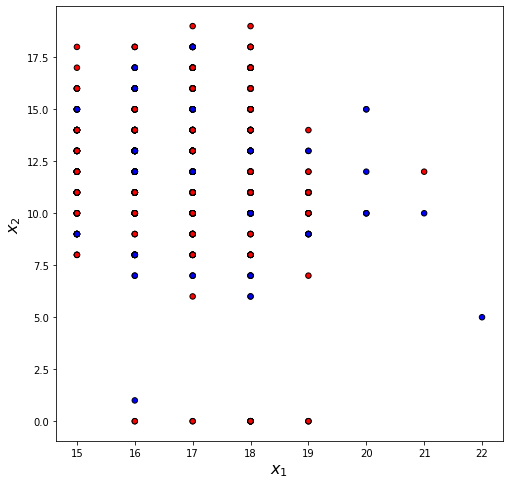

In [406]:
df2 = dfporbin[['age','G3','romantic']]
df2.columns = ['x1','x2','y']
print(df2.columns)
plot_2d_classification_samples(df2)

Index(['x1', 'x2', 'y'], dtype='object')


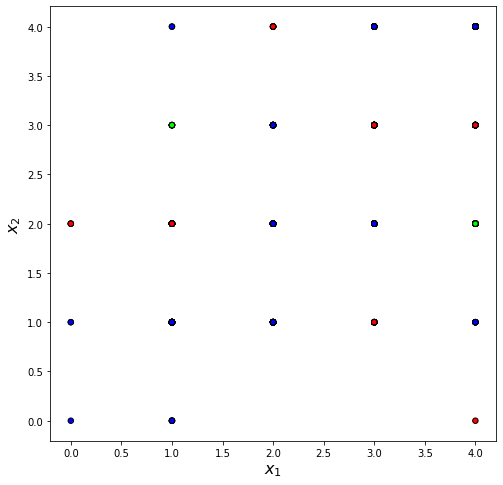

In [407]:
dfporbin.columns
df3 = dfporbin[['Medu','Fedu','health']]
df3.columns = ['x1','x2','y']
print(df3.columns)
plot_2d_classification_samples(df3)


#

In [475]:
def basis_expansion(x, degree=5):
    # Intercept
    Z_list = [np.ones(shape=x.shape)]
    
    # x^1, x^2, ...
    for deg_index in range(1, degree + 1):
        Z_list.append(x**deg_index)
    
    return np.array(Z_list).T

DEGREE = 4

Z = basis_expansion(x, degree=DEGREE)

# Make and fit the model

model = sklearn.linear_model.LinearRegression(fit_intercept=False)
model.fit(Z, y)

print("Coefs:", model.coef_)

# Compute the model's prediction

x_pred = np.linspace(x.min(), x.max(), 100)
Z_pred = basis_expansion(x_pred, degree=DEGREE)
Z_pred

y_pred = model.predict(Z_pred)

# Plot prediction and training set

fig, ax = plt.subplots(figsize=(18, 8))
ax.plot(x_pred, y_pred)
ax.scatter(x, y)
plt.show();

ValueError: Found array with dim 3. Estimator expected <= 2.

# Joining grade data for maths and portuguese

In [480]:
dfm1 = dfmat[['G1','G2','G3']]
dfp1 = dfpor[['G1','G2','G3']]
dfp1 = dfp1.rename(columns={"G1": "GP1", "G2": "GP2", 'G3':'GP3'})
dfmp = pd.concat([dfm1,dfp1], axis=1, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)
dfmp

##drop NaN rows
dfmp.dropna()

,G1,G2,G3,GP1,GP2,GP3
0,5.0,6.0,6.0,0,11,11
1,5.0,5.0,6.0,9,11,11
2,7.0,8.0,10.0,12,13,12
3,15.0,14.0,15.0,14,14,14
4,6.0,10.0,10.0,11,13,13
...,...,...,...,...,...,...
390,9.0,9.0,9.0,14,13,14
391,14.0,16.0,16.0,11,13,14
392,10.0,8.0,7.0,12,13,15
393,11.0,12.0,10.0,14,14,15


No handles with labels found to put in legend.


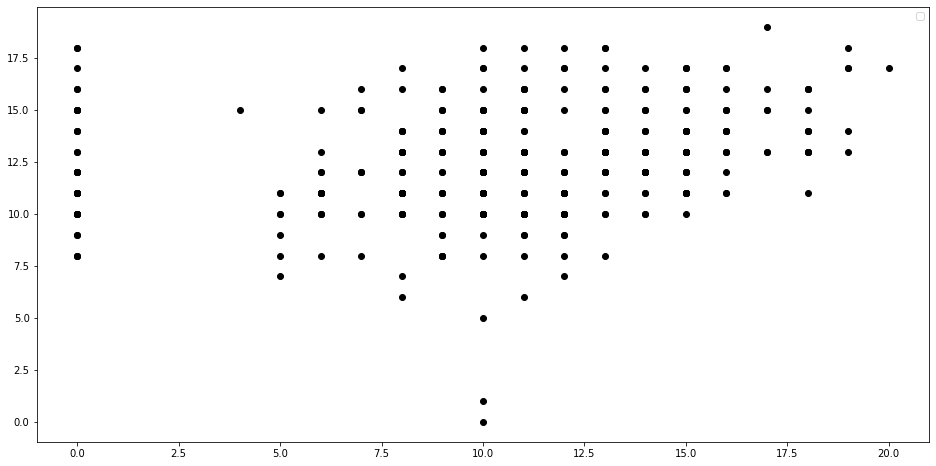

In [488]:
scatter_plot(dfmp['G3'],dfmp['GP3'])